Compare the computation time of algorithmns able to do elementwise mathematical operations on arbitrarily shaped lists.

Author: rdraschwandtner

TODO add github link

### Setup

In [1]:
import operator
import functools
import numpy as np
import pandas as pd
import timeit

In [2]:
a = [ 1,  2,  3,  4, [ 5,  6,  7,  8]]
b = [10, 20, 30, 40, [50, 60, 70, 80]]

depth_fact = 6

In [3]:
def appendlst_toelemoflst(lst): 
    return list(map(lambda el:[el,lst], lst)) 

In [4]:
def count_numoflists(lst, list_cnt = 0):
    for elem in lst:
        if type(elem) == list:
            list_cnt = count_numoflists(elem, list_cnt +1)
    return list_cnt

print('# of lists: ' + str(count_numoflists(a)))

# of lists: 1


### Map fct

In [5]:
def elementwise_map_listoperation_wrapper(lhs, rhs, op):
    # bind operator-function to function call. Functions are not iterable, so map() would throw an error.
    return list(map(functools.partial(listoperation,op=op), lhs, rhs)) # https://stackoverflow.com/questions/10314859/applying-map-for-partial-argument

def listoperation(lhs, rhs, op):
    if type(lhs) == list:
        return elementwise_map_listoperation_wrapper(lhs, rhs, op)
    else:
        return lhs + rhs

In [6]:
timeit.timeit('elementwise_map_listoperation_wrapper(a, b, operator.add)', globals=globals(), number=1)

1.8199999999524152e-05

### Fct List comprehension
https://stackoverflow.com/a/57615641/11963667

In [7]:
def element_wise_lstcompfct(a, b, f):
    return [element_wise_lstcompfct(i, j, f) if type(i) == list and type(j) == list else f(i, j) for i, j in zip(a, b)]

In [8]:
timeit.timeit('element_wise_lstcompfct(a, b, operator.add)', globals=globals(), number=1)

1.4800000002423985e-05

### Lambda list comprehension

In [9]:
element_wise_lstcomplambda = lambda lhs, rhs, op: [element_wise_lstcomplambda(i,j,op) if type(i)==list and type(j) == list else op(i,j) for i, j in zip(lhs, rhs)]

In [10]:
timeit.timeit('element_wise_lstcomplambda(a, b, operator.add)', globals=globals(), number=1)

1.4500000006023583e-05

## Trial

In [11]:
result_df = pd.DataFrame()
for level in range(depth_fact):
    print('level: ' + str(level))
    tmp_df = pd.DataFrame()
    tmp_df['num_of_lists'] = [count_numoflists(a)]
    
    times_map = timeit.repeat('elementwise_map_listoperation_wrapper(a, b, operator.add)', globals=globals(), number=1, repeat=10)
    tmp_df['avg_exectime_map'] = [np.mean(times_map)]
    tmp_df['min_exectime_map'] = [np.min(times_map)]
    tmp_df['max_exectime_map'] = [np.max(times_map)]

    times_lstcompfct = timeit.repeat('element_wise_lstcompfct(a, b, operator.add)', globals=globals(), number=1, repeat=10)
    tmp_df['avg_exectime_lstcompfct'] = [np.mean(times_lstcompfct)]
    tmp_df['min_exectime_lstcompfct'] = [np.min(times_lstcompfct)]
    tmp_df['max_exectime_lstcompfct'] = [np.max(times_lstcompfct)]

    times_lstcomplambda = timeit.repeat('element_wise_lstcomplambda(a, b, operator.add)', globals=globals(), number=1, repeat=10)
    tmp_df['avg_exectime_lstcomplambda'] = [np.mean(times_lstcomplambda)]
    tmp_df['min_exectime_lstcomplambda'] = [np.min(times_lstcomplambda)]
    tmp_df['max_exectime_lstcomplambda'] = [np.max(times_lstcomplambda)]
    
    result_df = result_df.append(tmp_df)
    
    # make the lists deeper for the next round
    a = appendlst_toelemoflst(a)
    b = appendlst_toelemoflst(b)


level: 0
level: 1
level: 2
level: 3
level: 4
level: 5


## Results

In [12]:
import matplotlib.pyplot as plt
#%matplotlib widget
# %matplotlib notebook
import seaborn as sns
sns.set()

In [13]:
result_df

,num_of_lists,avg_exectime_map,min_exectime_map,max_exectime_map,avg_exectime_lstcompfct,min_exectime_lstcompfct,max_exectime_lstcompfct,avg_exectime_lstcomplambda,min_exectime_lstcomplambda,max_exectime_lstcomplambda
0,1,0.000013,0.000011,0.000021,0.000009,0.000008,0.000017,0.000009,0.000008,0.000014
0,16,0.000065,0.000063,0.000078,0.000049,0.000046,0.000059,0.000052,0.000046,0.000074
0,106,0.000385,0.000374,0.000416,0.000275,0.000269,0.000285,0.000270,0.000264,0.000279
0,646,0.002339,0.002282,0.002430,0.001628,0.001619,0.001667,0.001651,0.001571,0.002165
0,3886,0.016026,0.013857,0.031093,0.009443,0.008947,0.010021,0.009598,0.009350,0.010511
0,23326,0.090868,0.084697,0.107371,0.084059,0.061380,0.185024,0.064029,0.057942,0.102519


Text(0.5, 1.0, 'Elementwise-sum of two lists')

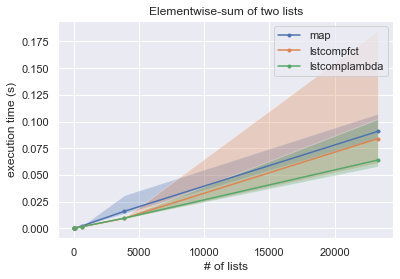

In [14]:
plt.plot(result_df['num_of_lists'], result_df['avg_exectime_map'],marker='.')
plt.fill_between(result_df['num_of_lists'],result_df['min_exectime_map'],result_df['max_exectime_map'], alpha = 0.3)
plt.plot(result_df['num_of_lists'], result_df['avg_exectime_lstcompfct'],marker='.')
plt.fill_between(result_df['num_of_lists'],result_df['min_exectime_lstcompfct'],result_df['max_exectime_lstcompfct'], alpha = 0.3)
plt.plot(result_df['num_of_lists'], result_df['avg_exectime_lstcomplambda'],marker='.')
plt.fill_between(result_df['num_of_lists'],result_df['min_exectime_lstcomplambda'],result_df['max_exectime_lstcomplambda'], alpha = 0.3)
plt.xlabel('# of lists')
plt.ylabel('execution time (s)')
plt.legend(['map','lstcompfct','lstcomplambda'])
plt.title('Elementwise-sum of two lists')

Text(0.5, 1.0, 'Log-Log Elementwise-sum of two lists')

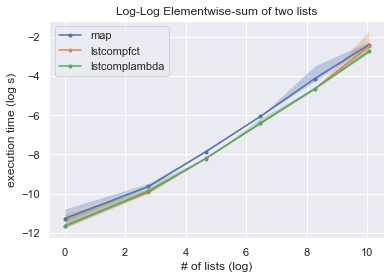

In [16]:
plt.plot(np.log(result_df['num_of_lists']), np.log(result_df['avg_exectime_map']),marker='.')
plt.fill_between(np.log(result_df['num_of_lists']),np.log(result_df['min_exectime_map']),np.log(result_df['max_exectime_map']), alpha = 0.3)
plt.plot(np.log(result_df['num_of_lists']), np.log(result_df['avg_exectime_lstcompfct']),marker='.')
plt.fill_between(np.log(result_df['num_of_lists']),np.log(result_df['min_exectime_lstcompfct']),np.log(result_df['max_exectime_lstcompfct']), alpha = 0.3)
plt.plot(np.log(result_df['num_of_lists']), np.log(result_df['avg_exectime_lstcomplambda']),marker='.')
plt.fill_between(np.log(result_df['num_of_lists']),np.log(result_df['min_exectime_lstcomplambda']),np.log(result_df['max_exectime_lstcomplambda']), alpha = 0.3)
plt.xlabel('# of lists (log)')
plt.ylabel('execution time (log s)')
plt.legend(['map','lstcompfct','lstcomplambda'])
plt.title('Log-Log Elementwise-sum of two lists')

Average, minimum and maximum values of each repitition are shown.
One can see that map is slower than lstcompfct and lstcomplambda.
There is no visible difference between lstcompfct and lstcomplambda.

TODO test significance

### Appendix

In [19]:
#!pip freeze

In [21]:
import platform
platform.uname()

uname_result(system='Windows', node='Rene-PC', release='10', version='10.0.18362', machine='AMD64', processor='Intel64 Family 6 Model 23 Stepping 10, GenuineIntel')